In [334]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft,fftshift,fftfreq

## 1. Discretize the continuous 𝑥𝑐 = sin 180𝜋𝑡 with sampling frequency 𝑓𝑠 = 100 𝐻𝑧 for 𝑡 = [0,2] and take the FFT of the corresponding discrete signal. {-}

In [118]:
def number_1(f, fs):
    
    n = np.arange(201) / fs
    y = []
    Ts = 1/fs
    
    for i in n:
        
        fn = np.sin((np.pi*f*i))
        y.append(fn)
    
    return n, y

def number_1_plot(f, fs):
    
    z = number_1(f, fs)
    
    xlist = z[0]
    ylist = z[1]
    
    plt.plot(xlist, ylist)
    plt.grid(True)
    plt.axhline(y=0, color='black')
    plt.xlabel('t=nT')
    plt.ylabel('x')
    plt.show()

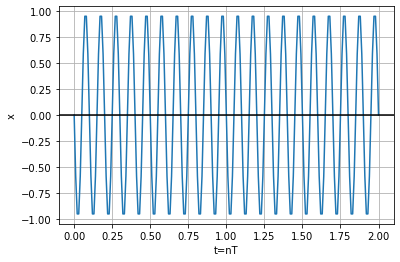

In [119]:
number_1_plot(180, 100)

## a. Provide the plot of the corresponding FFT (real part) of the signal with frequency on the x-axis. {-}

In [189]:
def fourier_transform(f, fs):

    z = number_1(f, fs)
    Ts = 1/fs
    
    transform1 = fft(z[1], 201)
    f_list = fftfreq(len(transform1))*fs
    transform1 = fftshift(transform1)
    f_list = fftshift(f_list)
    
    return f_list, transform1

def fourier_transform_plot(f, fs):
    
    z = fourier_transform(f, fs) 
    
    plt.plot(z[0], np.abs(z[1]))
    plt.title('Discrete Fourier Transform')
    plt.show()
    

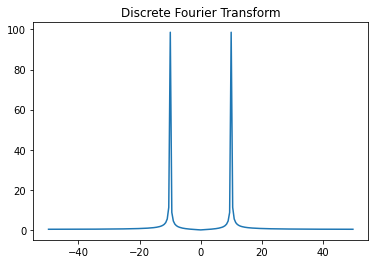

In [187]:
fourier_transform_plot(180, 100)

## b. Where do the peaks occur? {-}
The peaks occur at  𝑓=−10, 10 Hz.

## c. What frequency signal does it alias? What is the difference in the peaks between the signal and the alias signal in their FFT (real part)? {-}
The aliased signal has a frequency of  0.1 Hz.At different iterations, the peaks shift and have smaller amplitudes.

## d. What is the maximum frequency signal can the FFT represent in this sampling rate? {-}
$f_{max} \geq \frac{f_{s}}{2} \geq \frac{100}{2} \geq 50Hz$

## e. Does the FFT satisfy the Nyquist criterion where it can only represent the frequency domain of a signal if  $𝑓_𝑠≥2𝑓_{signal}$  Explain. {-}
Yes. The Nyquist frequency is the highest frequency component in the input signal that must be present in order for the FFT to produce unaliased results. The input signal can be reconstructed exactly from the samples if there are no frequencies above the Nyquist frequency.

## 2. Plot of $x_1 = \sin 2\pi (20) t + 10\sin 2\pi (30) t$, with sampling rate of $f_{\text{sampling}} = 100 \ \text{Hz}$ for  $t=[0,2]$ {-}

In [200]:
def number_2(f1, f2, a1, a2, fs):
    
    n = np.arange(201) / fs
    y1 = []
    y2 = []
    
    for i in n:
        
        fn1 = a1*np.sin((2*np.pi*f1*i))
        y1.append(fn1)
        
        fn2 = a2*(np.sin((2*np.pi*f2*i)))
        y2.append(fn2)
    
    y = []
    
    
    for j in range(len(n)):
        
        add = y1[j] + y2[j]
        y.append(add)
    
    return n, y

In [201]:
def number_2_plot(f1, f2, a1, a2, fs):
    
    z = number_2(f1, f2, a1, a2, fs)
    
    plt.plot(z[0], z[1])
    plt.grid(True)
    plt.axhline(y=0, color='black')
    plt.xlabel('t=nT')
    plt.ylabel('x')
    plt.show()

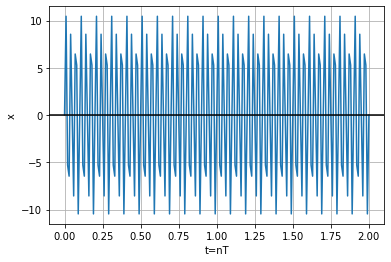

In [208]:
number_2_plot(20, 30, 1, 10, 100)

## b. Take the FFT of the sequence x[n] and plot the frequency domain of the signal x[n], i.e, X vs. f. {-}

In [203]:
def fourier_transform_2(f1, f2, a1, a2, fs):      
    
    z = number_2(f1, f2, a1, a2, fs)
    
    transform1 = fft(z[1], 201)
    f_list = fftfreq(len(transform1))*fs
    transform1 = fftshift(transform1)
    f_list = fftshift(f_list)
    
    return f_list, transform1


In [220]:
def fourier_transform_plot_2(f1, f2, a1, a2, fs):
    
    z = fourier_transform_2(f1, f2, a1, a2, fs)
    
    plt.plot(z[0], np.abs(z[1]))
    plt.title('Discrete Fourier Transform')
    plt.show()    

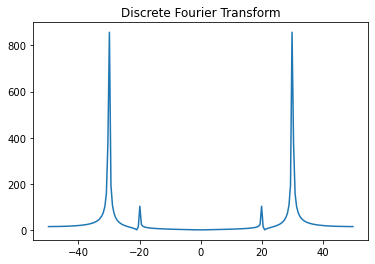

In [221]:
fourier_transform_plot_2(20, 30, 1, 10, 100)

## Where are the peaks located? {-}
The peaks occur at f = -30, 30 Hz and f = -20, 20 Hz

## c. In the frequency domain, which has larger peak? 20 Hz or 30 Hz? {-}
The 30 Hz has a larger peak

## d. Plot of $x_1 = \sin 2\pi (30) t + 10\sin 2\pi (70) t$, with sampling rate of $f_{\text{sampling}} = 100 \ \text{Hz}$ for  $t=[0,2]$, and plot of its FFT in the frequency domain: {-}

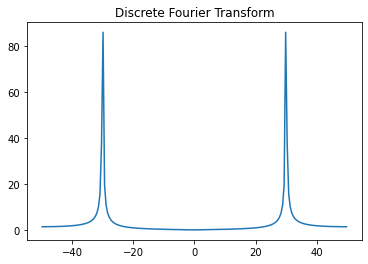

In [245]:
fourier_transform_plot_2(30, 70, 1, 1, 100)

## Are there two peaks in the graph of the real part of the FFT? {-}
There is only one peak

## 3. Create a python program that will generate a square wave {-}
## Generate the plot for N=5,10, and 25 with sampling rate 𝑓𝑠 = 100 𝐻𝑧 and fundamental frequency 𝑓 = 1𝐻z {-}

In [305]:
def number_3(N, fs, f):

    t = np.arange(201)/fs
    x = []
    
    
    for i in t:
        
        output = 0
        for n in range(N):
            
            output += (1/(2*n + 1)) * np.sin(2*np.pi*(2*n + f) * i)
        
        x.append((2/np.pi)*output)
    
    return t, x


In [306]:
def number_3_plot(n1, n2, n3, fs, f):
    
    a = [n1, n2, n3]
    for i in a:
        z = number_3(i, fs, f)
    
        xlist = z[0]
        ylist = z[1]
    
        plt.plot(xlist, ylist)
        plt.title('N = {}'.format(i))
        plt.xlabel('t')
        plt.ylabel('x')
        plt.show()


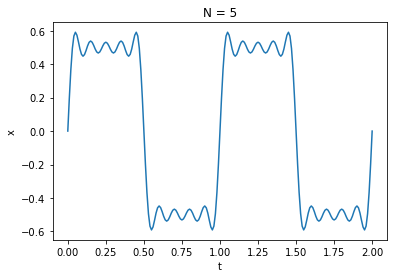

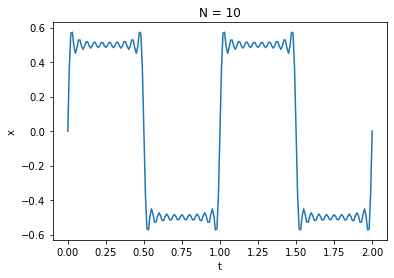

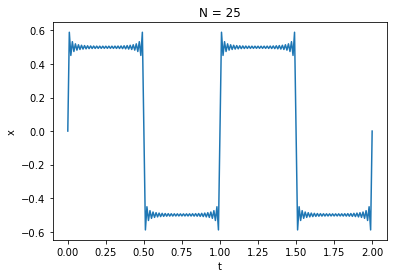

In [307]:
number_3_plot(5, 10, 25, 100, 1)

## The plot above is the sum waves with N number of harmonics. What did you observe in the plot as the number of harmonics N increases? Does there still exist a overshoot at the discontinuities of the square wave (This is known as The Gibb’s Phenomenon)? {-}
As N increases, the plots resemble the original square wave more and more, but the overshoots become more noticeable. If we keep increasing N until it reaches a very large number, the overshoots gradually disappear.


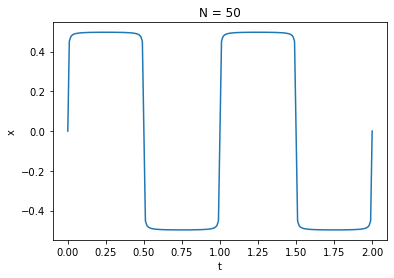

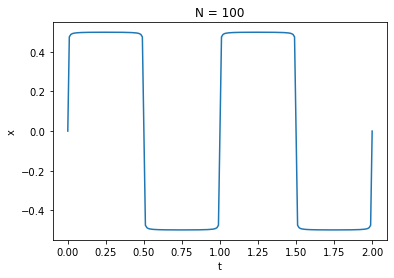

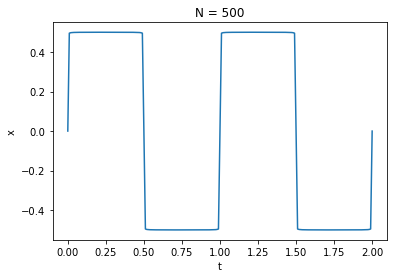

In [308]:
number_3_plot(50, 100, 500, 100, 1)

In [326]:
def fourier_transform_3(N, fs, f):

    z = number_3(N, fs, f)
    
    transform1 = fft(z[1], 201)
    f_list = fftfreq(len(transform1))*fs
    transform1 = fftshift(transform1)
    f_list = fftshift(f_list)
    
    return f_list, transform1

def fourier_transform_plot_3(N, fs, f):
    
    z = fourier_transform_3(N, fs, f) 
    
    plt.plot(z[0], np.abs(z[1]))
    plt.xlim([-25,25])
    plt.title('Discrete Fourier Transform for N = {}'.format(N))
    plt.ylabel('|X|')
    plt.xlabel('f')
    plt.show()
    

## c.) Now plot the FFT of the square wave for N=5 consider only the positive frequencies in the horizontal axis(take the 1-sided FFT). Describe what happens to the peaks at higher order harmonics. What are the frequencies for the 1st harmonic, 2nd harmonic, 3rd harmonic, 4th harmonic, and fifth harmonic (Note this corresponds to the peaks in the frequency space) {-}

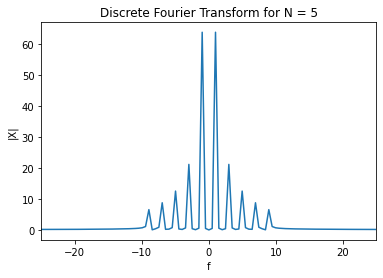

In [327]:
fourier_transform_plot_3(5, 100, 1)

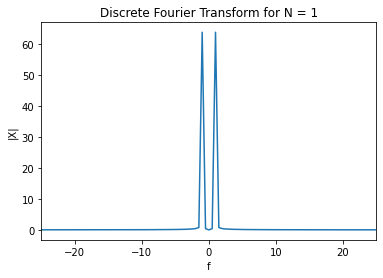

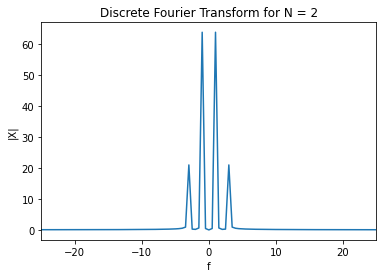

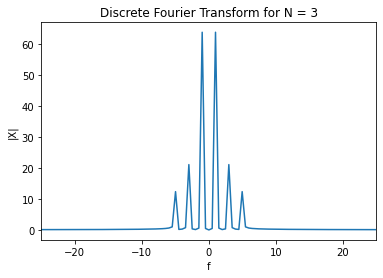

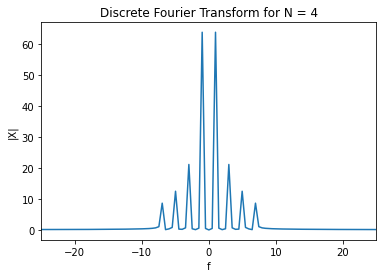

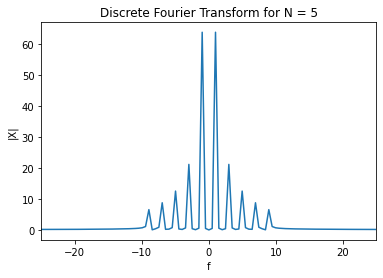

In [330]:
N = [1, 2, 3, 4, 5]
for i in N:
    fourier_transform_plot_3(i, 100, 1)

For the first harmonic, there's one peak. For the second, there are two peaks, and the pattern continues up to the fifth.

## d. Now increase the number of harmonics to N=10. How does the number of peaks relate to the number of harmonics? {-}
For every nth harmonic, there are n peaks.

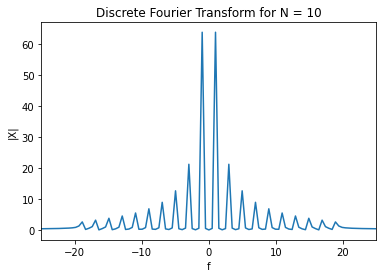

In [332]:
fourier_transform_plot_3(10, 100, 1)